<a href="https://colab.research.google.com/github/serenelu-1/lds-project-1/blob/main/LDS_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading in the Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tuition_cost = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')
tuition_cost


name  ... out_of_state_total
0                   Aaniiih Nakoda College  ...               2380
1             Abilene Christian University  ...              45200
2     Abraham Baldwin Agricultural College  ...              21024
3                          Academy College  ...              17661
4                Academy of Art University  ...              44458
...                                    ...  ...                ...
2968                York Technical College  ...              12190
2969                  Young Harris College  ...              41489
2970           Youngstown State University  ...              24350
2971                          Yuba College  ...               8420
2972                    Zane State College  ...               9930

[2973 rows x 10 columns]

In [ ]:
tuition_income = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_income.csv')
tuition_income.to_csv(r'tuition_income.csv', index = False)
tuition_income



name state  ...     net_cost         income_lvl
0       Piedmont International University    NC  ...  11475.00000        0 to 30,000
1       Piedmont International University    NC  ...  11451.00000   30,001 to 48,000
2       Piedmont International University    NC  ...  16229.00000   48_001 to 75,000
3       Piedmont International University    NC  ...  15592.00000  75,001 to 110,000
4       Piedmont International University    NC  ...  11668.39249        0 to 30,000
...                                   ...   ...  ...          ...                ...
209007           Alabama A & M University    AL  ...  15089.45111        0 to 30,000
209008           Alabama A & M University    AL  ...  14810.60535   30,001 to 48,000
209009           Alabama A & M University    AL  ...  17167.46710   48_001 to 75,000
209010           Alabama A & M University    AL  ...  17558.05619  75,001 to 110,000
209011           Alabama A & M University    AL  ...  19433.08888       Over 110,000

[209012 rows x 7 columns]

In [ ]:
salary_potential = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv')
salary_potential.to_csv(r'salary_potential_official.csv', index = False)
salary_potential

rank  ... stem_percent
0       1  ...           31
1       2  ...           45
2       3  ...           15
3       4  ...           30
4       5  ...            3
..    ...  ...          ...
930    22  ...            3
931    23  ...            9
932    24  ...           17
933    25  ...           14
934     1  ...           25

[935 rows x 7 columns]

In [ ]:
historical_tuition = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/historical_tuition.csv')
historical_tuition.head

<bound method NDFrame.head of                  type     year     tuition_type  tuition_cost
0    All Institutions  1985-86     All Constant         10893
1    All Institutions  1985-86  4 Year Constant         12274
2    All Institutions  1985-86  2 Year Constant          7508
3    All Institutions  1985-86      All Current          4885
4    All Institutions  1985-86   4 Year Current          5504
..                ...      ...              ...           ...
265           Private  2016-17  4 Year Constant         41468
266           Private  2016-17  2 Year Constant         24882
267           Private  2016-17      All Current         40925
268           Private  2016-17   4 Year Current         41468
269           Private  2016-17   2 Year Current         24882

[270 rows x 4 columns]>

In [ ]:
diversity_school = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/diversity_school.csv')
diversity_school

name  ...  enrollment
0                       University of Phoenix-Arizona  ...      134722
1                       University of Phoenix-Arizona  ...         876
2                       University of Phoenix-Arizona  ...        1959
3                       University of Phoenix-Arizona  ...       31455
4                       University of Phoenix-Arizona  ...       13984
...                                               ...  ...         ...
50650  ITT Technical Institute at Cedar Rapids (Iowa)  ...           1
50651  ITT Technical Institute at Cedar Rapids (Iowa)  ...           0
50652  ITT Technical Institute at Cedar Rapids (Iowa)  ...           0
50653  ITT Technical Institute at Cedar Rapids (Iowa)  ...           0
50654  ITT Technical Institute at Cedar Rapids (Iowa)  ...           0

[50655 rows x 5 columns]

In [ ]:
college = [tuition_cost,tuition_income,diversity_school, historical_tuition, salary_potential]
college_df = pd.concat(college)
college_df

name  ... stem_percent
0                  Aaniiih Nakoda College  ...          NaN
1            Abilene Christian University  ...          NaN
2    Abraham Baldwin Agricultural College  ...          NaN
3                         Academy College  ...          NaN
4               Academy of Art University  ...          NaN
..                                    ...  ...          ...
930                    Viterbo University  ...          3.0
931        Concordia University-Wisconsin  ...          9.0
932      University of Wisconsin-Parkside  ...         17.0
933   University of Wisconsin-River Falls  ...         14.0
934                 University of Wyoming  ...         25.0

[263845 rows x 26 columns]

# Data Cleaning

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns

categorical_variables = college_df.select_dtypes(
    ['object', 'category']).columns.tolist()

numerical_variables = college_df.select_dtypes(include=np.number)

# 25 largest by count grouped counts: Exchange different measurements at your discretion. 
def means_by_category(col_group, col_calc):
    college_df.groupby(col_group)[col_calc].count().nlargest(25).plot(kind='barh', figsize=(10,10)) 
    sns.mpl.pyplot.xlabel('Count values for variable {}'.format(col_calc))

interact(means_by_category, col_group=categorical_variables, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_group', options=('name', 'state', 'state_code', 'type', 'degre…

Changing Data Types

In [ ]:
tuition_cost = tuition_cost.astype({"in_state_tuition": np.float64, "out_of_state_tuition": np.float64})
tuition_cost.to_csv(r'tuition_cost_official.csv', index = False)
tuition_cost.dtypes


name                     object
state                    object
state_code               object
type                     object
degree_length            object
room_and_board          float64
in_state_tuition        float64
in_state_total            int64
out_of_state_tuition    float64
out_of_state_total        int64
dtype: object

In [ ]:
tuition_income['year'] = tuition_income['year'].astype(str)
tuition_income['total_price'] = tuition_income['total_price'].astype(np.float64)
tuition_income.dtypes


name            object
state           object
total_price    float64
year            object
campus          object
net_cost       float64
income_lvl      object
dtype: object

In [ ]:
salary_potential = salary_potential.astype({"early_career_pay": np.float64, "mid_career_pay": np.float64})
salary_potential.dtypes

rank                           int64
name                          object
state_name                    object
early_career_pay             float64
mid_career_pay               float64
make_world_better_percent    float64
stem_percent                   int64
dtype: object

In [ ]:
diversity_school['name'] = diversity_school['name'].astype(str)
diversity_school.dtypes

name                object
total_enrollment     int64
state               object
category            object
enrollment           int64
dtype: object

NaN Thresholding

In [ ]:
def get_proportion_null(df):
  for x in df:
    return df.isna().sum() / df.shape[0]

In [ ]:
print(get_proportion_null(tuition_income))

name           0.0
state          0.0
total_price    0.0
year           0.0
campus         0.0
net_cost       0.0
income_lvl     0.0
dtype: float64


In [ ]:
print(get_proportion_null(tuition_cost))

name                    0.000000
state                   0.017491
state_code              0.000000
type                    0.000000
degree_length           0.000000
room_and_board          0.367978
in_state_tuition        0.000000
in_state_total          0.000000
out_of_state_tuition    0.000000
out_of_state_total      0.000000
dtype: float64


In [ ]:
print(get_proportion_null(historical_tuition))

type            0.0
year            0.0
tuition_type    0.0
tuition_cost    0.0
dtype: float64


In [ ]:
print(get_proportion_null(salary_potential))

rank                         0.000000
name                         0.000000
state_name                   0.000000
early_career_pay             0.000000
mid_career_pay               0.000000
make_world_better_percent    0.035294
stem_percent                 0.000000
dtype: float64


In [ ]:
print(get_proportion_null(historical_tuition))

type            0.0
year            0.0
tuition_type    0.0
tuition_cost    0.0
dtype: float64


Deleting Columns

In [ ]:
tuition_cost.drop(columns=['degree_length', 'room_and_board', 'in_state_tuition', 'out_of_state_tuition'])

name  ... out_of_state_total
0                   Aaniiih Nakoda College  ...               2380
1             Abilene Christian University  ...              45200
2     Abraham Baldwin Agricultural College  ...              21024
3                          Academy College  ...              17661
4                Academy of Art University  ...              44458
...                                    ...  ...                ...
2968                York Technical College  ...              12190
2969                  Young Harris College  ...              41489
2970           Youngstown State University  ...              24350
2971                          Yuba College  ...               8420
2972                    Zane State College  ...               9930

[2973 rows x 6 columns]

In [ ]:
tuition_income.drop(columns = 'total_price')

name state  ...     net_cost         income_lvl
0       Piedmont International University    NC  ...  11475.00000        0 to 30,000
1       Piedmont International University    NC  ...  11451.00000   30,001 to 48,000
2       Piedmont International University    NC  ...  16229.00000   48_001 to 75,000
3       Piedmont International University    NC  ...  15592.00000  75,001 to 110,000
4       Piedmont International University    NC  ...  11668.39249        0 to 30,000
...                                   ...   ...  ...          ...                ...
209007           Alabama A & M University    AL  ...  15089.45111        0 to 30,000
209008           Alabama A & M University    AL  ...  14810.60535   30,001 to 48,000
209009           Alabama A & M University    AL  ...  17167.46710   48_001 to 75,000
209010           Alabama A & M University    AL  ...  17558.05619  75,001 to 110,000
209011           Alabama A & M University    AL  ...  19433.08888       Over 110,000

[209012 rows x 6 columns]

In [ ]:
salary_potential.drop(columns='make_world_better_percent')

rank                                 name  ... mid_career_pay  stem_percent
0       1                    Auburn University  ...       104500.0            31
1       2  University of Alabama in Huntsville  ...       103900.0            45
2       3            The University of Alabama  ...        97400.0            15
3       4                  Tuskegee University  ...        93500.0            30
4       5                   Samford University  ...        90500.0             3
..    ...                                  ...  ...            ...           ...
930    22                   Viterbo University  ...        81900.0             3
931    23       Concordia University-Wisconsin  ...        81600.0             9
932    24     University of Wisconsin-Parkside  ...        81400.0            17
933    25  University of Wisconsin-River Falls  ...        81300.0            14
934     1                University of Wyoming  ...        98800.0            25

[935 rows x 6 columns]

# Reorganizing Dataframes

TUITION INCOME REORGANIZATION

In [ ]:
tuition_income = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_income.csv')
tuition_income

name state  ...     net_cost         income_lvl
0       Piedmont International University    NC  ...  11475.00000        0 to 30,000
1       Piedmont International University    NC  ...  11451.00000   30,001 to 48,000
2       Piedmont International University    NC  ...  16229.00000   48_001 to 75,000
3       Piedmont International University    NC  ...  15592.00000  75,001 to 110,000
4       Piedmont International University    NC  ...  11668.39249        0 to 30,000
...                                   ...   ...  ...          ...                ...
209007           Alabama A & M University    AL  ...  15089.45111        0 to 30,000
209008           Alabama A & M University    AL  ...  14810.60535   30,001 to 48,000
209009           Alabama A & M University    AL  ...  17167.46710   48_001 to 75,000
209010           Alabama A & M University    AL  ...  17558.05619  75,001 to 110,000
209011           Alabama A & M University    AL  ...  19433.08888       Over 110,000

[209012 rows x 7 columns]

New DF with only school names and states

In [ ]:
tuition_no_repeats = tuition_income.drop_duplicates(subset=['name'], inplace=False)
tuition_income_df = tuition_no_repeats[['name', 'state']]
tuition_income_df

name state
0           Piedmont International University    NC
28                Kaplan University-Milwaukee    WI
38             Kaplan University-Indianapolis    IN
48          Chamberlain University-California    CA
58      Chamberlain University-North Carolina    NC
...                                       ...   ...
208651               Alabama State University    AL
208736    University of Alabama in Huntsville    AL
208821                     Amridge University    AL
208842    University of Alabama at Birmingham    AL
208927               Alabama A & M University    AL

[3664 rows x 2 columns]

Finding 0 to 30k in 2018 on campus

In [ ]:
income_bracket_1 = tuition_income[(tuition_income.year == 2018) & (tuition_income['campus'] == "On Campus") & (tuition_income['income_lvl'] == "0 to 30,000")]
income_bracket_1_price = income_bracket_1[['name', 'net_cost']]
income_bracket_1_price

name      net_cost
9         Piedmont International University  11847.564940
127          Yeshiva Gedolah Shaarei Shmuel      0.000000
138             Beth Medrash of Asbury Park      0.000000
164        Elim Bible Institute and College  10025.362210
191               Yeshivas Maharit D'Satmar   7687.641379
...                                     ...           ...
208611            The University of Alabama  19297.253990
208686             Alabama State University  13839.864520
208771  University of Alabama in Huntsville  17306.161220
208877  University of Alabama at Birmingham  15592.610040
208962             Alabama A & M University  15089.451110

[1960 rows x 2 columns]

In [ ]:
tuition_income_merged = pd.merge(tuition_income_df,income_bracket_1_price, on = 'name')
tuition_income_merged = tuition_income_merged.rename(columns = {'net_cost': 'bracket_1_cost_2018'})
tuition_income_merged

name state  bracket_1_cost_2018
0       Piedmont International University    NC         11847.564940
1          Yeshiva Gedolah Shaarei Shmuel    NJ             0.000000
2             Beth Medrash of Asbury Park    NJ             0.000000
3        Elim Bible Institute and College    NY         10025.362210
4               Yeshivas Maharit D'Satmar    NY          7687.641379
...                                   ...   ...                  ...
1955            The University of Alabama    AL         19297.253990
1956             Alabama State University    AL         13839.864520
1957  University of Alabama in Huntsville    AL         17306.161220
1958  University of Alabama at Birmingham    AL         15592.610040
1959             Alabama A & M University    AL         15089.451110

[1960 rows x 3 columns]

Finding 30,001 to 48,000 in 2018 on campus

In [ ]:
income_bracket_2 = tuition_income[(tuition_income.year == 2018) & (tuition_income['campus'] == "On Campus") & (tuition_income['income_lvl'] == "30,001 to 48,000")]
income_bracket_2_price = income_bracket_2[['name', 'net_cost']]
tuition_income_merged1 = pd.merge(tuition_income_merged,income_bracket_2_price, on = 'name')
tuition_income_merged1 = tuition_income_merged1.rename(columns = {'net_cost': 'bracket_2_cost_2018'})
tuition_income_merged1

name  ... bracket_2_cost_2018
0       Piedmont International University  ...        11822.785710
1          Yeshiva Gedolah Shaarei Shmuel  ...         7790.328337
2             Beth Medrash of Asbury Park  ...            0.000000
3        Elim Bible Institute and College  ...         4497.406784
4               Yeshivas Maharit D'Satmar  ...        12135.108370
...                                   ...  ...                 ...
1989            The University of Alabama  ...        20864.612010
1990             Alabama State University  ...        13887.161050
1991  University of Alabama in Huntsville  ...        18727.580830
1992  University of Alabama at Birmingham  ...        17048.804710
1993             Alabama A & M University  ...        14810.605350

[1994 rows x 4 columns]

Finding 48,001 to 75,000 in 2018 on campus

In [ ]:
income_bracket_3 = tuition_income[(tuition_income.year == 2018) & (tuition_income['campus'] == "On Campus") & (tuition_income['income_lvl'] == "48_001 to 75,000")]
income_bracket_3_price = income_bracket_3[['name', 'net_cost']]
tuition_income_merged2 = pd.merge(tuition_income_merged1,income_bracket_3_price, on = 'name')
tuition_income_merged2 = tuition_income_merged2.rename(columns = {'net_cost': 'bracket_3_cost_2018'})
tuition_income_merged2

name  ... bracket_3_cost_2018
0       Piedmont International University  ...        16755.915580
1          Yeshiva Gedolah Shaarei Shmuel  ...         7844.568166
2             Beth Medrash of Asbury Park  ...            0.000000
3        Elim Bible Institute and College  ...        12719.951360
4               Yeshivas Maharit D'Satmar  ...            0.000000
...                                   ...  ...                 ...
2069            The University of Alabama  ...        23503.118880
2070             Alabama State University  ...        18138.217890
2071  University of Alabama in Huntsville  ...        22405.153580
2072  University of Alabama at Birmingham  ...        19276.466210
2073             Alabama A & M University  ...        17167.467100

[2074 rows x 5 columns]

Finding 75,001 to 110,000 in 2018 on campus & Final DF for tuition_income

In [ ]:
income_bracket_4 = tuition_income[(tuition_income.year == 2018) & (tuition_income['campus'] == "On Campus") & (tuition_income['income_lvl'] == "75,001 to 110,000")]
income_bracket_4_price = income_bracket_4[['name', 'net_cost']]
tuition_income_merged3 = pd.merge(tuition_income_merged2,income_bracket_4_price, on = 'name')
tuition_income_merged3 = tuition_income_merged3.rename(columns = {'net_cost': 'bracket_4_cost_2018'})
tuition_income_merged3

name  ... bracket_4_cost_2018
0       Piedmont International University  ...         16098.23377
1          Yeshiva Gedolah Shaarei Shmuel  ...             0.00000
2             Beth Medrash of Asbury Park  ...         14234.04908
3        Elim Bible Institute and College  ...         15868.13611
4               Yeshivas Maharit D'Satmar  ...             0.00000
...                                   ...  ...                 ...
2265            The University of Alabama  ...         25296.30906
2266             Alabama State University  ...         18749.69441
2267  University of Alabama in Huntsville  ...         23609.80130
2268  University of Alabama at Birmingham  ...         20235.69746
2269             Alabama A & M University  ...         17558.05619

[2270 rows x 6 columns]

Final DF for tuition_income

In [ ]:
tuition_income_official = pd.DataFrame(tuition_income_merged3)
tuition_income_official.to_csv(r'tuition_income_official.csv', index = False)
tuition_income_official

name  ... bracket_4_cost_2018
0       Piedmont International University  ...         16098.23377
1          Yeshiva Gedolah Shaarei Shmuel  ...             0.00000
2             Beth Medrash of Asbury Park  ...         14234.04908
3        Elim Bible Institute and College  ...         15868.13611
4               Yeshivas Maharit D'Satmar  ...             0.00000
...                                   ...  ...                 ...
2265            The University of Alabama  ...         25296.30906
2266             Alabama State University  ...         18749.69441
2267  University of Alabama in Huntsville  ...         23609.80130
2268  University of Alabama at Birmingham  ...         20235.69746
2269             Alabama A & M University  ...         17558.05619

[2270 rows x 6 columns]

DIVERSITY REORGANIZATION

In [ ]:
diversity_school

name  ...  enrollment
0                       University of Phoenix-Arizona  ...      134722
1                       University of Phoenix-Arizona  ...         876
2                       University of Phoenix-Arizona  ...        1959
3                       University of Phoenix-Arizona  ...       31455
4                       University of Phoenix-Arizona  ...       13984
...                                               ...  ...         ...
50650  ITT Technical Institute at Cedar Rapids (Iowa)  ...           1
50651  ITT Technical Institute at Cedar Rapids (Iowa)  ...           0
50652  ITT Technical Institute at Cedar Rapids (Iowa)  ...           0
50653  ITT Technical Institute at Cedar Rapids (Iowa)  ...           0
50654  ITT Technical Institute at Cedar Rapids (Iowa)  ...           0

[50655 rows x 5 columns]

New DF with only schools names and states

In [ ]:
diversity_no_repeats = diversity_school.drop_duplicates(subset=['name'], inplace=False)
diversity_school_df = diversity_no_repeats[['name', 'state']]
diversity_school_df

name         state
0                          University of Phoenix-Arizona       Arizona
11            Ivy Tech Community College-Central Indiana       Indiana
22                                    Liberty University      Virginia
33                              Lone Star College system         Texas
44                                    Miami Dade College       Florida
...                                                  ...           ...
50600    ITT Technical Institute at West Covina (Calif.)    California
50611  Danville Regional Medical Center School of Hea...      Virginia
50622                                     Pace Institute  Pennsylvania
50633       ITT Technical Institute at Germantown (Wis.)     Wisconsin
50644     ITT Technical Institute at Cedar Rapids (Iowa)          Iowa

[4575 rows x 2 columns]

Finding Women

In [ ]:
women_enrollment = diversity_school[diversity_school["category"] == "Women"]
women_enrollment_df = women_enrollment[['name', 'enrollment']]
diversity_women = pd.merge(women_enrollment_df, diversity_school_df, how = 'right', on = 'name')
diversity_women = diversity_women.rename(columns = {'enrollment': 'women_enrollment'})
diversity_women

name  ...         state
0                         University of Phoenix-Arizona  ...       Arizona
1            Ivy Tech Community College-Central Indiana  ...       Indiana
2                                    Liberty University  ...      Virginia
3                              Lone Star College system  ...         Texas
4                                    Miami Dade College  ...       Florida
...                                                 ...  ...           ...
4600    ITT Technical Institute at West Covina (Calif.)  ...    California
4601  Danville Regional Medical Center School of Hea...  ...      Virginia
4602                                     Pace Institute  ...  Pennsylvania
4603       ITT Technical Institute at Germantown (Wis.)  ...     Wisconsin
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...          Iowa

[4605 rows x 3 columns]

In [ ]:
diversity_women

name  ...         state
0                         University of Phoenix-Arizona  ...       Arizona
1            Ivy Tech Community College-Central Indiana  ...       Indiana
2                                    Liberty University  ...      Virginia
3                              Lone Star College system  ...         Texas
4                                    Miami Dade College  ...       Florida
...                                                 ...  ...           ...
4600    ITT Technical Institute at West Covina (Calif.)  ...    California
4601  Danville Regional Medical Center School of Hea...  ...      Virginia
4602                                     Pace Institute  ...  Pennsylvania
4603       ITT Technical Institute at Germantown (Wis.)  ...     Wisconsin
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...          Iowa

[4605 rows x 3 columns]

Finding American Indian / Alaska Native enrollment

In [ ]:
aian_enrollment = diversity_school[diversity_school["category"] == "American Indian / Alaska Native"]
aian_enrollment_df = aian_enrollment[['name', 'enrollment']]
diversity_aian = diversity_women.merge(aian_enrollment_df, how = 'left', on = 'name')
diversity_aian = diversity_aian.rename(columns = {'enrollment': 'aian_enrollment'})
diversity_aian = diversity_aian.drop_duplicates(subset = 'name')
diversity_aian

name  ...  aian_enrollment
0                         University of Phoenix-Arizona  ...              876
1            Ivy Tech Community College-Central Indiana  ...              357
2                                    Liberty University  ...              447
3                              Lone Star College system  ...              168
4                                    Miami Dade College  ...               47
...                                                 ...  ...              ...
5530    ITT Technical Institute at West Covina (Calif.)  ...                0
5531  Danville Regional Medical Center School of Hea...  ...                0
5532                                     Pace Institute  ...                0
5533       ITT Technical Institute at Germantown (Wis.)  ...                0
5534     ITT Technical Institute at Cedar Rapids (Iowa)  ...                0

[4575 rows x 4 columns]

In [ ]:
aian_enrollment_df

name  enrollment
1                          University of Phoenix-Arizona         876
12            Ivy Tech Community College-Central Indiana         357
23                                    Liberty University         447
34                              Lone Star College system         168
45                                    Miami Dade College          47
...                                                  ...         ...
50601    ITT Technical Institute at West Covina (Calif.)           0
50612  Danville Regional Medical Center School of Hea...           0
50623                                     Pace Institute           0
50634       ITT Technical Institute at Germantown (Wis.)           0
50645     ITT Technical Institute at Cedar Rapids (Iowa)           0

[4605 rows x 2 columns]

Finding Asian enrollment

In [ ]:
asian_enrollment = diversity_school[diversity_school["category"] == "Asian"]
asian_enrollment_df = asian_enrollment[['name', 'enrollment']]
diversity_asian = diversity_aian.merge(asian_enrollment_df, how = 'left', on = 'name')
diversity_asian = diversity_asian.rename(columns = {'enrollment': 'asian_enrollment'})
diversity_asian = diversity_asian.drop_duplicates(subset = 'name')
diversity_asian

name  ...  asian_enrollment
0                         University of Phoenix-Arizona  ...              1959
1            Ivy Tech Community College-Central Indiana  ...              1369
2                                    Liberty University  ...               856
3                              Lone Star College system  ...              4198
4                                    Miami Dade College  ...               655
...                                                 ...  ...               ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                 0
4601  Danville Regional Medical Center School of Hea...  ...                 0
4602                                     Pace Institute  ...                 0
4603       ITT Technical Institute at Germantown (Wis.)  ...                 0
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                 0

[4575 rows x 5 columns]

Finding Black enrollment

In [ ]:
black_enrollment = diversity_school[diversity_school["category"] == "Black"]
black_enrollment_df = black_enrollment[['name', 'enrollment']]
diversity_black = diversity_asian.merge(black_enrollment_df, how = 'left', on = 'name')
diversity_black = diversity_black.rename(columns = {'enrollment': 'black_enrollment'})
diversity_black = diversity_black.drop_duplicates(subset = 'name')
diversity_black

name  ...  black_enrollment
0                         University of Phoenix-Arizona  ...             31455
1            Ivy Tech Community College-Central Indiana  ...             12370
2                                    Liberty University  ...             14751
3                              Lone Star College system  ...             12094
4                                    Miami Dade College  ...             10722
...                                                 ...  ...               ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                 0
4601  Danville Regional Medical Center School of Hea...  ...                 1
4602                                     Pace Institute  ...                 1
4603       ITT Technical Institute at Germantown (Wis.)  ...                 2
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                 0

[4575 rows x 6 columns]

Finding Hispanic enrollment

In [ ]:
hispanic_enrollment = diversity_school[diversity_school["category"] == "Hispanic"]
hispanic_enrollment_df = hispanic_enrollment[['name', 'enrollment']]
diversity_hispanic = diversity_black.merge(hispanic_enrollment_df, how = 'left', on = 'name')
diversity_hispanic = diversity_hispanic.rename(columns = {'enrollment': 'hispanic_enrollment'})
diversity_hispanic = diversity_hispanic.drop_duplicates(subset = 'name')
diversity_hispanic

name  ...  hispanic_enrollment
0                         University of Phoenix-Arizona  ...                13984
1            Ivy Tech Community College-Central Indiana  ...                 5533
2                                    Liberty University  ...                 1186
3                              Lone Star College system  ...                23751
4                                    Miami Dade College  ...                44870
...                                                 ...  ...                  ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                    8
4601  Danville Regional Medical Center School of Hea...  ...                    0
4602                                     Pace Institute  ...                    2
4603       ITT Technical Institute at Germantown (Wis.)  ...                    0
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                    0

[4575 rows x 7 columns]

Finding Native Hawaiian / Pacific Islander enrollment

In [ ]:
nhpi_enrollment = diversity_school[diversity_school["category"] == "Native Hawaiian / Pacific Islander"]
nhpi_enrollment_df = nhpi_enrollment[['name', 'enrollment']]
diversity_nhpi = diversity_hispanic.merge(nhpi_enrollment_df, how = 'left', on = 'name')
diversity_nhpi = diversity_nhpi.rename(columns = {'enrollment': 'nhpi_enrollment'})
diversity_nhpi = diversity_nhpi.drop_duplicates(subset = 'name')
diversity_nhpi

name  ...  nhpi_enrollment
0                         University of Phoenix-Arizona  ...             1019
1            Ivy Tech Community College-Central Indiana  ...                0
2                                    Liberty University  ...              151
3                              Lone Star College system  ...                0
4                                    Miami Dade College  ...               41
...                                                 ...  ...              ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                0
4601  Danville Regional Medical Center School of Hea...  ...                0
4602                                     Pace Institute  ...                0
4603       ITT Technical Institute at Germantown (Wis.)  ...                0
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                0

[4575 rows x 8 columns]

Finding White enrollment

In [ ]:
white_enrollment = diversity_school[diversity_school["category"] == "White"]
white_enrollment_df = white_enrollment[['name', 'enrollment']]
diversity_white = diversity_nhpi.merge(white_enrollment_df, how = 'left', on = 'name')
diversity_white = diversity_white.rename(columns = {'enrollment': 'white_enrollment'})
diversity_white = diversity_white.drop_duplicates(subset = 'name')
diversity_white

name  ...  white_enrollment
0                         University of Phoenix-Arizona  ...             58209
1            Ivy Tech Community College-Central Indiana  ...             61498
2                                    Liberty University  ...             39062
3                              Lone Star College system  ...             23615
4                                    Miami Dade College  ...              4170
...                                                 ...  ...               ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                 0
4601  Danville Regional Medical Center School of Hea...  ...                 6
4602                                     Pace Institute  ...                 1
4603       ITT Technical Institute at Germantown (Wis.)  ...                 2
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                 1

[4575 rows x 9 columns]

Finding Two Or More Races enrollment

In [ ]:
mixed_enrollment = diversity_school[diversity_school["category"] == "Two Or More Races"]
mixed_enrollment_df = mixed_enrollment[['name', 'enrollment']]
diversity_mixed = diversity_white.merge(mixed_enrollment_df, how = 'left', on = 'name')
diversity_mixed = diversity_mixed.rename(columns = {'enrollment': 'mixed_enrollment'})
diversity_mixed = diversity_mixed.drop_duplicates(subset = 'name')
diversity_mixed

name  ...  mixed_enrollment
0                         University of Phoenix-Arizona  ...             19039
1            Ivy Tech Community College-Central Indiana  ...              1804
2                                    Liberty University  ...              1772
3                              Lone Star College system  ...              1997
4                                    Miami Dade College  ...               226
...                                                 ...  ...               ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                 0
4601  Danville Regional Medical Center School of Hea...  ...                 0
4602                                     Pace Institute  ...                 1
4603       ITT Technical Institute at Germantown (Wis.)  ...                 0
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                 0

[4575 rows x 10 columns]

Finding Unknown enrollment

In [ ]:
unknown_enrollment = diversity_school[diversity_school["category"] == "Unknown"]
unknown_enrollment_df = unknown_enrollment[['name', 'enrollment']]
diversity_unknown = diversity_mixed.merge(unknown_enrollment_df, how = 'left', on = 'name')
diversity_unknown = diversity_unknown.rename(columns = {'enrollment': 'unknown_enrollment'})
diversity_unknown = diversity_unknown.drop_duplicates(subset = 'name')
diversity_unknown

name  ...  unknown_enrollment
0                         University of Phoenix-Arizona  ...               65163
1            Ivy Tech Community College-Central Indiana  ...                8224
2                                    Liberty University  ...               22198
3                              Lone Star College system  ...                2273
4                                    Miami Dade College  ...                1927
...                                                 ...  ...                 ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                   0
4601  Danville Regional Medical Center School of Hea...  ...                   0
4602                                     Pace Institute  ...                   0
4603       ITT Technical Institute at Germantown (Wis.)  ...                   0
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                   0

[4575 rows x 11 columns]

Finding Non-Resident / Foreign enrollment


In [ ]:
foreign_enrollment = diversity_school[diversity_school["category"] == "Non-Resident Foreign"]
foreign_enrollment_df = foreign_enrollment[['name', 'enrollment']]
diversity_foreign = diversity_unknown.merge(foreign_enrollment_df, how = 'left', on = 'name')
diversity_foreign = diversity_foreign.rename(columns = {'enrollment': 'foreign_enrollment'})
diversity_foreign = diversity_foreign.drop_duplicates(subset = 'name')
diversity_foreign

name  ...  foreign_enrollment
0                         University of Phoenix-Arizona  ...                3355
1            Ivy Tech Community College-Central Indiana  ...                  24
2                                    Liberty University  ...                1036
3                              Lone Star College system  ...                1299
4                                    Miami Dade College  ...                3388
...                                                 ...  ...                 ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                   0
4601  Danville Regional Medical Center School of Hea...  ...                   0
4602                                     Pace Institute  ...                   0
4603       ITT Technical Institute at Germantown (Wis.)  ...                   0
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                   0

[4575 rows x 12 columns]

Finding Total Minority enrollment

In [ ]:
minority_enrollment = diversity_school[diversity_school["category"] == "Total Minority"]
minority_enrollment_df = minority_enrollment[['name', 'enrollment']]
diversity_minority = diversity_foreign.merge(minority_enrollment_df, how = 'left', on = 'name')
diversity_minority = diversity_minority.rename(columns = {'enrollment': 'minority_enrollment'})
diversity_minority = diversity_minority.drop_duplicates(subset = 'name')
diversity_minority

name  ...  minority_enrollment
0                         University of Phoenix-Arizona  ...                68332
1            Ivy Tech Community College-Central Indiana  ...                21433
2                                    Liberty University  ...                19163
3                              Lone Star College system  ...                42208
4                                    Miami Dade College  ...                56561
...                                                 ...  ...                  ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                    8
4601  Danville Regional Medical Center School of Hea...  ...                    1
4602                                     Pace Institute  ...                    4
4603       ITT Technical Institute at Germantown (Wis.)  ...                    2
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                    0

[4575 rows x 13 columns]

Final updated diversity_school df

In [ ]:
diversity_school_official = pd.DataFrame(diversity_minority)
diversity_school_official.to_csv(r'diversity_school_official.csv', index = False)
diversity_school_official

name  ...  minority_enrollment
0                         University of Phoenix-Arizona  ...                68332
1            Ivy Tech Community College-Central Indiana  ...                21433
2                                    Liberty University  ...                19163
3                              Lone Star College system  ...                42208
4                                    Miami Dade College  ...                56561
...                                                 ...  ...                  ...
4600    ITT Technical Institute at West Covina (Calif.)  ...                    8
4601  Danville Regional Medical Center School of Hea...  ...                    1
4602                                     Pace Institute  ...                    4
4603       ITT Technical Institute at Germantown (Wis.)  ...                    2
4604     ITT Technical Institute at Cedar Rapids (Iowa)  ...                    0

[4575 rows x 13 columns]

# Preliminary Analytic Findings

In [ ]:
#Imports 
import pandas as pd
import matplotlib.pyplot as plt 

Tuition Cost Analysis

In [ ]:
tuition_cost

name  ... out_of_state_total
0                   Aaniiih Nakoda College  ...               2380
1             Abilene Christian University  ...              45200
2     Abraham Baldwin Agricultural College  ...              21024
3                          Academy College  ...              17661
4                Academy of Art University  ...              44458
...                                    ...  ...                ...
2968                York Technical College  ...              12190
2969                  Young Harris College  ...              41489
2970           Youngstown State University  ...              24350
2971                          Yuba College  ...               8420
2972                    Zane State College  ...               9930

[2973 rows x 10 columns]

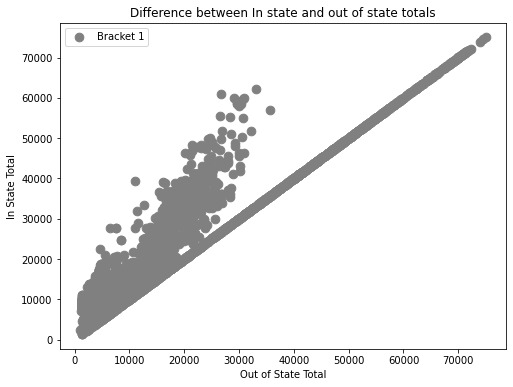

In [ ]:
#Create a Figure with 1 subplot (Axes)
fig, ax = plt.subplots()

#Setting figure size to be a bit bigger:
fig.set_figheight(6)
fig.set_figwidth(8)


ax.scatter(tuition_cost.in_state_total, tuition_cost.out_of_state_total, label="Bracket 1", s= 75, c= "grey")

ax.set_xlabel("Out of State Total")
ax.set_ylabel("In State Total")
ax.set_title("Difference between In state and out of state totals")

ax.legend()

Income Analysis

In [ ]:
tuition_income_official

name  ... bracket_4_cost_2018
0       Piedmont International University  ...         16098.23377
1          Yeshiva Gedolah Shaarei Shmuel  ...             0.00000
2             Beth Medrash of Asbury Park  ...         14234.04908
3        Elim Bible Institute and College  ...         15868.13611
4               Yeshivas Maharit D'Satmar  ...             0.00000
...                                   ...  ...                 ...
2265            The University of Alabama  ...         25296.30906
2266             Alabama State University  ...         18749.69441
2267  University of Alabama in Huntsville  ...         23609.80130
2268  University of Alabama at Birmingham  ...         20235.69746
2269             Alabama A & M University  ...         17558.05619

[2270 rows x 6 columns]

In [ ]:
tuition_income

name state  ...     net_cost         income_lvl
0       Piedmont International University    NC  ...  11475.00000        0 to 30,000
1       Piedmont International University    NC  ...  11451.00000   30,001 to 48,000
2       Piedmont International University    NC  ...  16229.00000   48_001 to 75,000
3       Piedmont International University    NC  ...  15592.00000  75,001 to 110,000
4       Piedmont International University    NC  ...  11668.39249        0 to 30,000
...                                   ...   ...  ...          ...                ...
209007           Alabama A & M University    AL  ...  15089.45111        0 to 30,000
209008           Alabama A & M University    AL  ...  14810.60535   30,001 to 48,000
209009           Alabama A & M University    AL  ...  17167.46710   48_001 to 75,000
209010           Alabama A & M University    AL  ...  17558.05619  75,001 to 110,000
209011           Alabama A & M University    AL  ...  19433.08888       Over 110,000

[209012 rows x 7 columns]

In [ ]:
import plotly.express as px
fig = px.bar(tuition_income, x='income_lvl', y='net_cost')
fig.show()

Salary Analysis

In [ ]:
salary_potential

rank  ... stem_percent
0       1  ...           31
1       2  ...           45
2       3  ...           15
3       4  ...           30
4       5  ...            3
..    ...  ...          ...
930    22  ...            3
931    23  ...            9
932    24  ...           17
933    25  ...           14
934     1  ...           25

[935 rows x 7 columns]

In [ ]:
axs[0][0].bar